In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from custom_modules import descriptive_analysis as da
from custom_modules import analysis as a
from custom_modules import feature_engineering as fe

In [4]:
file_path_1 = r"gs://ppl-analytics-cfs/Survival Ad-hoc/2022 Adjustment eff February 20, 2022 revised.xlsx"
file_path_2 = r"gs://ppl-analytics-cfs/Survival Ad-hoc/Copy of DemographicData.csv"
file_path_3 = r"gs://ppl-analytics-cfs/Survival Ad-hoc/adjustment -June 2022.xlsx"
file_path_4 = r"gs://ppl-analytics-cfs/Survival Ad-hoc/Book2.xlsx"

In [5]:
df = pd.read_excel(file_path_1)
df_colleague = pd.read_csv(file_path_2, low_memory=False)
df_june = pd.read_excel(file_path_3)
df_pc = pd.read_excel(file_path_4)

/opt/conda/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [6]:
df_june.shape

(9806, 73)

In [7]:
df['Adjustment Difference'] = df['Adjustment_Diff']*100

In [8]:
df = df[~df['Employee ID'].isna()]

In [9]:
da.display_description(df)

Data shape: 8602 (rows), 37 (columns)


,Column Name,Type,# of Unique,# of Values,# of Missing
0,2021 Top Talent,object,3,409,8193
1,Adjustment Difference,float64,502,8539,63
2,Adjustment_Diff,float64,502,8539,63
3,Business Unit,object,23,8602,0
4,Categorization Flag,object,4,8602,0
5,Comp Validated Prioritzation Segment,object,4,8602,0
6,Competency in Role (based on current role),object,4,8602,0
7,Current Annualized Rate,float64,3151,8602,0
8,Current Internal Ratio,float64,5031,8602,0
9,Current Market Ratio,float64,6350,8539,63


In [10]:
df[df['Grade'].str.contains('Hourly') == True][['Market Reference','Current Salary','Final EIB Adjustment',
       'Final EIB Annualized Salary', 'Final Market Ratio',
       'Final Internal Ratio', 'Adjustment_Diff', 'Recommended Salary/Wage',
       'Recommended Adjustment']]

,Market Reference,Current Salary,Final EIB Adjustment,Final EIB Annualized Salary,Final Market Ratio,Final Internal Ratio,Adjustment_Diff,Recommended Salary/Wage,Recommended Adjustment
8317,22.172596,11.810000,0.0,24564.80000,0.532639,0.532639,0.0,18.846707,14636.35000
8318,22.172596,11.810000,0.0,24564.80000,0.532639,0.532639,0.0,18.846707,14636.35000
8319,22.172596,11.810000,0.0,24564.80000,0.532639,0.532639,0.0,18.846707,14636.35000
8320,32.884615,17.998920,0.0,37437.75360,0.547336,0.547336,0.0,29.596154,24122.24640
8321,31.368750,19.101744,0.0,39731.62752,0.608942,0.608942,0.0,29.800312,22253.02248
...,...,...,...,...,...,...,...,...,...
8574,0.000000,29.131200,0.0,60592.89600,NaN,NaN,NaN,29.131200,NaN
8575,0.000000,20.400000,0.0,42432.00000,NaN,NaN,NaN,20.866140,969.57120
8576,0.000000,60.343200,0.0,125513.85600,NaN,NaN,NaN,60.343200,NaN
8577,0.000000,27.209373,0.0,56595.49584,NaN,NaN,NaN,27.209373,NaN


In [11]:
df['Market Reference Annualized 2'] = np.where(df['Grade'].str.contains('Hourly'), df['Market Reference']*280, df['Market Reference'])

In [12]:
df[['Market reference annualized', 'Market Reference Annualized 2']]

,Market reference annualized,Market Reference Annualized 2
0,55000.0,55000.0
1,55000.0,55000.0
2,55000.0,55000.0
3,55000.0,55000.0
4,55000.0,55000.0
...,...,...
8597,0.0,0.0
8598,0.0,0.0
8599,0.0,0.0
8600,0.0,0.0


In [13]:
df[(df['Grade'].str.contains('Hourly')) & (~df['Grade'].isna())][['Current Salary', 'Current Annualized Rate','Final EIB Annualized Salary']]

,Current Salary,Current Annualized Rate,Final EIB Annualized Salary
8317,11.810000,24564.80000,24564.80000
8318,11.810000,24564.80000,24564.80000
8319,11.810000,24564.80000,24564.80000
8320,17.998920,37437.75360,37437.75360
8321,19.101744,39731.62752,39731.62752
...,...,...,...
8574,29.131200,60592.89600,60592.89600
8575,20.400000,42432.00000,42432.00000
8576,60.343200,125513.85600,125513.85600
8577,27.209373,56595.49584,56595.49584


In [14]:
df_colleague.columns

Index(['ID - Win', 'Company', 'Structure', 'Dist Channel Group',
       'Cost Centers', 'Cost Center Hierarchy', 'Store Number', 'Store Dept',
       'Job Profile', 'GEAC Job code', 'Job Title', 'Union?', 'Employee Type',
       'Time Type', 'Management Level', 'Is Manager', 'Default Weekly Hours',
       'Hire Date', 'Yrs of Service as of Dec 31st', 'Original Hire Date',
       'Active Status', 'On Leave', 'Terminated', 'Termination Date',
       'Termination Category', 'Termination Reason', 'Region', 'Date of Birth',
       'Province', 'Pay Rate Type - Worker', 'Pay Rate Type - Job Profile',
       'Compensation Grade', 'Compensation Plan Type', 'Compensation Plan',
       'Cost Center - Name', 'Time Profile', 'Pay Group',
       'INTCF - 032 - Supervisory Org Subtype', 'Union', 'Time in Position'],
      dtype='object')

# Merge

In [15]:
df_merged = df.merge(df_colleague[['ID - Win', 'Hire Date','Terminated', 'Termination Date','Termination Category']], left_on = 'Employee ID' , right_on = 'ID - Win', how = 'left')

In [16]:
filter_1 = (df_merged['Termination Category'] != 'Involuntary')

In [17]:
df_final = df_merged[(filter_1)]

In [18]:
print(df.shape)
print(df_colleague.shape)
print(df_merged.shape)
print(df_final.shape)

(8602, 38)
(135032, 40)
(8602, 43)
(8561, 43)


# Feature Engineering

In [19]:
df_final['Terminated'] = np.where(df_final['Terminated'] == 'Yes', 1, 0)
df_final['2021 Top Talent'] = np.where(df_final['2021 Top Talent'] == 'Yes', 1, 0)
df_final['HIPO + HIPER'] = np.where(df_final['HIPO + HIPER'] == 'Yes', 1, 0)
df_final['Hot Skill'] = np.where(df_final['Hot Skill'] == 'Yes', 1, 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [20]:
df_final['Final Market Ratio'] = df_final['Final EIB Annualized Salary']/df_final['Market reference annualized']*100

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_final['Final Market Ratio']

0       101.876564
1       102.816600
2       100.256727
3       101.818182
4       101.818182
           ...    
8597           inf
8598           inf
8599           inf
8600           inf
8601           inf
Name: Final Market Ratio, Length: 8561, dtype: float64

In [22]:
df_grouped_mean = df_final.groupby('Grade').agg({'Current Annualized Rate':'mean','Terminated':'sum','Adjustment Difference':'mean','Final Market Ratio':'mean'}).reset_index()

In [23]:
df_grouped_mean

,Grade,Current Annualized Rate,Terminated,Adjustment Difference,Final Market Ratio
0,B-20,50522.525000,0,4.241276,99.543362
1,B-30,57706.279231,0,1.644978,91.468658
2,B-40,73287.211778,9,0.568828,103.760769
3,B-50,90059.304685,7,1.485383,97.879985
4,B-60,114674.140714,1,2.653998,101.243973
5,B-70,145616.184783,0,2.420211,101.983817
6,B-80,183920.510000,0,3.427828,115.711250
7,E-20,46677.922236,6,0.060676,NaN
8,E-20 Hourly,41674.353015,14,0.000000,NaN
9,E-30,54983.327262,25,0.141198,95.637484


In [24]:
# df_grouped_mean = df_grouped_mean[~df_grouped_mean['Final Market Ratio'].isna()]
df_grouped_mean

,Grade,Current Annualized Rate,Terminated,Adjustment Difference,Final Market Ratio
0,B-20,50522.525000,0,4.241276,99.543362
1,B-30,57706.279231,0,1.644978,91.468658
2,B-40,73287.211778,9,0.568828,103.760769
3,B-50,90059.304685,7,1.485383,97.879985
4,B-60,114674.140714,1,2.653998,101.243973
5,B-70,145616.184783,0,2.420211,101.983817
6,B-80,183920.510000,0,3.427828,115.711250
7,E-20,46677.922236,6,0.060676,NaN
8,E-20 Hourly,41674.353015,14,0.000000,NaN
9,E-30,54983.327262,25,0.141198,95.637484


In [25]:
df_final['Adjustment Difference'].max()

30.145432624074363

# WoE

In [26]:
df_final['Adjustment Difference']

0      -0.003436
1      -0.003400
2      -0.003273
3      -0.001818
4      -0.001818
          ...   
8597         NaN
8598         NaN
8599         NaN
8600         NaN
8601         NaN
Name: Adjustment Difference, Length: 8561, dtype: float64

<AxesSubplot:>

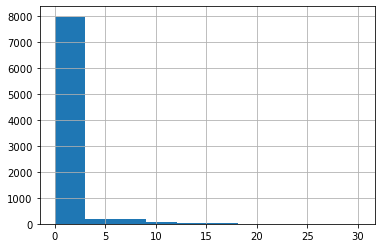

In [27]:
df_final['Adjustment Difference'].hist()

In [28]:
adj_bin = [-100,0.2,3,1000]
adj_bin_names = ['<0.2','0.2-3','>3']
df_final['adj_cat'] = pd.cut(df_final['Adjustment Difference'], bins = adj_bin, labels = adj_bin_names)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
df_woe_adjust = a.reg_analysis.getWOE(df_final, 'adj_cat', 'Terminated')
df_woe_adjust

/opt/conda/lib/python3.7/site-packages/custom_modules/analysis.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[targetVariable+'1'] = df[targetVariable]


,noOfEvents,totalSamples,nonOfnonevent,per_event,per_nonevent,woe
adj_cat,,,,,,
<0.2,202,7913,7711,0.971154,0.930157,-0.043132
0.2-3,1,72,71,0.004808,0.008565,0.577413
>3,5,513,508,0.024038,0.061279,0.935776


In [30]:
df_woe_adjust = a.reg_analysis.getWOE(df_final, 'adj_cat', 'Terminated')
df_woe_adjust

/opt/conda/lib/python3.7/site-packages/custom_modules/analysis.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[targetVariable+'1'] = df[targetVariable]


,noOfEvents,totalSamples,nonOfnonevent,per_event,per_nonevent,woe
adj_cat,,,,,,
<0.2,202,7913,7711,0.971154,0.930157,-0.043132
0.2-3,1,72,71,0.004808,0.008565,0.577413
>3,5,513,508,0.024038,0.061279,0.935776


In [31]:
da.list_unique_values(df_final,['Potential'])

List of unique values:

Potential
- High
- Low
- Medium
- Too Early to Rank


In [32]:
df_mratio = df_final[df_final['Final Market Ratio'] != np.inf]

<AxesSubplot:>

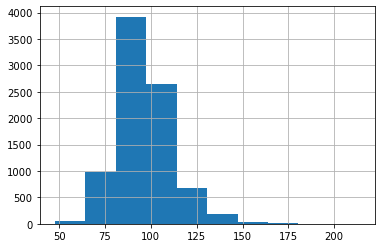

In [33]:
df_mratio['Final Market Ratio'].hist()

In [34]:
market_bin = [-100,80,95,130,1000]
market_bin_names = ['<80','80-100','100-130','>130']
df_mratio['market_cat'] = pd.cut(df_mratio['Final Market Ratio'], bins = market_bin, labels = market_bin_names)
df_final['market_cat'] = pd.cut(df_final['Final Market Ratio'], bins = market_bin, labels = market_bin_names)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [35]:
df_woe_market = a.reg_analysis.getWOE(df_final, 'market_cat', 'Terminated')

/opt/conda/lib/python3.7/site-packages/custom_modules/analysis.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[targetVariable+'1'] = df[targetVariable]


# Aggregation

In [36]:
len(df_final[(df_final['Received Adjustment?'] == 1) & ((df_final['Terminated'] == 1))])

6

In [37]:
df_final[(df_final['Received Adjustment?'] == 1) & ((df_final['Terminated'] == 1))].groupby('Grade').agg({'Adjustment Difference':'mean','Employee ID':'count'})

,Adjustment Difference,Employee ID
Grade,,
B-40,7.202093,1
E-40,6.998538,4
E-70,5.496980,1


In [38]:
len(df_final[(df_final['Received Adjustment?'] == 0) & ((df_final['Terminated'] == 1))])

202

In [39]:
df_final[(df_final['Received Adjustment?'] == 1) & ((df_final['Terminated'] == 0))].groupby('Grade').agg({'Adjustment Difference':'mean','Employee ID':'count'})

,Adjustment Difference,Employee ID
Grade,,
B-20,8.482552,1
B-30,7.128238,3
B-40,6.284634,7
B-50,8.243876,20
B-60,7.961994,14
B-70,6.958106,8
B-80,6.855656,8
E-20,10.072222,3
E-30,9.004078,13


In [40]:
len(df_final[(df_final['Received Adjustment?'] == 0) & ((df_final['Terminated'] == 0))])

7778

In [41]:
da.list_unique_values(df_final, ['Potential','Performance'])

List of unique values:

Potential
- High
- Low
- Medium
- Too Early to Rank

Performance
- Developing Contributor
- Exceptional Contributor
- Not Performing
- Successful Contributor


In [42]:
df_final.groupby('Potential').agg({'Terminated':'count'})

,Terminated
Potential,
High,1415
Low,1744
Medium,5400
Too Early to Rank,2


In [43]:
df_perform = df_final.groupby('Performance').agg({'Employee ID':'count','Terminated':'sum','HIPO + HIPER':'mean','Hot Skill':'mean','2021 Top Talent':'mean','Adjustment Difference':'mean'})
df_perform['Termination %'] = df_perform['Terminated']/df_perform['Employee ID']*100
display(df_perform)

,Employee ID,Terminated,HIPO + HIPER,Hot Skill,2021 Top Talent,Adjustment Difference,Termination %
Performance,,,,,,,
Developing Contributor,533,34,0.000000,0.121951,0.001876,0.251110,6.378987
Exceptional Contributor,1167,4,0.303342,0.072836,0.131105,1.175274,0.342759
Not Performing,24,0,0.000000,0.000000,0.000000,0.000000,0.000000
Successful Contributor,6837,170,0.000000,0.082785,0.031885,0.418606,2.486471


In [44]:
df_potential = df_final.groupby('Potential').agg({'Employee ID':'count','Terminated':'sum','HIPO + HIPER':'mean','Hot Skill':'mean','2021 Top Talent':'mean','Adjustment Difference':'mean'})
df_potential['Termination %'] = df_potential['Terminated']/df_potential['Employee ID']*100
display(df_potential)

,Employee ID,Terminated,HIPO + HIPER,Hot Skill,2021 Top Talent,Adjustment Difference,Termination %
Potential,,,,,,,
High,1415,23,0.250177,0.122261,0.129329,1.171407,1.625442
Low,1744,20,0.000000,0.033830,0.005161,0.257171,1.146789
Medium,5400,165,0.000000,0.089630,0.033333,0.419297,3.055556
Too Early to Rank,2,0,0.000000,0.000000,0.000000,0.000000,0.000000


In [45]:
table = pd.pivot_table(df_final, values = 'Terminated', index = ['Potential'], columns =['Performance'], aggfunc = np.mean)
table

Performance,Developing Contributor,Exceptional Contributor,Not Performing,Successful Contributor
Potential,,,,
High,0.052632,0.002825,NaN,0.018274
Low,0.042683,0.000000,0.0,0.009745
Medium,0.078498,0.005102,0.0,0.030773
Too Early to Rank,NaN,NaN,0.0,0.000000


# Logistic Regression

In [46]:
da.list_unique_values(df_final,['Potential'])

List of unique values:

Potential
- High
- Low
- Medium
- Too Early to Rank


In [47]:
df_final['Terminated'].value_counts()

0    8353
1     208
Name: Terminated, dtype: int64

In [48]:
df_final['Potential Cat'] = df_final['Potential'].map({'Too Early to Rank':'Too Early to Rank','Low':'Low Potential','Medium':'Medium Potential','High':'High Potential'})
# df_final['performance_cat'] = df_final['Performance'].map({'Developing Contributor':'D','Exceptional Contributor':'E','Not Performing':'N','Successful Contributor':'S'})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_merged_LReg = pd.DataFrame()

market_bin = [-100,80,95,130,1000]
market_bin_names = ['<80','80-100','100-130','>130']

adj_bin = [-100,0.2,3,1000]
adj_bin_names = ['<0.2','0.2-3','>3']

df_final['Market Ratio Cat'] = pd.cut(df_final['Final Market Ratio'], bins = market_bin, labels = market_bin_names)
df_final['Adjustment Ratio Cat'] = pd.cut(df_final['Adjustment Difference'], bins = adj_bin, labels = adj_bin_names)

featureForLogReg = ['Market Ratio Cat','Adjustment Ratio Cat','Potential Cat','Performance']
df_forClustering = df_final[featureForLogReg+['Terminated']+['Employee ID']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [50]:
df_forClustering['Terminated'].value_counts()

0    8353
1     208
Name: Terminated, dtype: int64

In [51]:
df_forClustering

,Market Ratio Cat,Adjustment Ratio Cat,Potential Cat,Performance,Terminated,Employee ID
0,100-130,<0.2,Medium Potential,Successful Contributor,0,200000728.0
1,100-130,<0.2,Medium Potential,Successful Contributor,0,10001268.0
2,100-130,<0.2,Medium Potential,Successful Contributor,0,200153241.0
3,100-130,<0.2,Medium Potential,Successful Contributor,0,200352085.0
4,100-130,<0.2,Medium Potential,Successful Contributor,0,200357091.0
...,...,...,...,...,...,...
8597,NaN,NaN,Medium Potential,Successful Contributor,0,120000106.0
8598,NaN,NaN,Medium Potential,Successful Contributor,0,200217196.0
8599,NaN,NaN,Low Potential,Successful Contributor,0,120000075.0
8600,NaN,NaN,Medium Potential,Successful Contributor,0,200248747.0


In [52]:
for col in featureForLogReg:
        df_forClustering = df_forClustering.join(pd.get_dummies(df_forClustering[col])) 
df_forClustering = df_forClustering.drop(featureForLogReg, axis=1)

In [53]:
df_forClustering_train,df_forClustering_test = train_test_split(df_forClustering,train_size = 0.3, random_state = 100)
df_forClustering_trainset,df_forClustering_validate = train_test_split(df_forClustering_train,train_size = 0.8, random_state = 101)

df_forClustering_x = df_forClustering_trainset.drop(['Employee ID','Terminated'], axis = 1)
df_forClustering_y = df_forClustering_trainset[['Terminated']]
    
clf = LogisticRegression(random_state=0).fit(df_forClustering_x, df_forClustering_y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
clf.score(df_forClustering_validate.drop(['Employee ID','Terminated'], axis=1),
          df_forClustering_validate['Terminated'])

0.9727626459143969

In [55]:
df_forClustering.columns

Index(['Terminated', 'Employee ID', '<80', '80-100', '100-130', '>130', '<0.2',
       '0.2-3', '>3', 'High Potential', 'Low Potential', 'Medium Potential',
       'Too Early to Rank', 'Developing Contributor',
       'Exceptional Contributor', 'Not Performing', 'Successful Contributor'],
      dtype='object')

In [56]:
prob = clf.predict_proba(df_forClustering.drop(['Employee ID','Terminated'], axis=1))
prob = [x for (x,y) in prob]

df_forClustering['Termination Probability'] = prob
df_forClustering
# listOfActiveColleagues[['Employee ID','teminationProbability']].to_csv('employee_level_teminationProbability.csv')

,Terminated,Employee ID,<80,80-100,100-130,>130,<0.2,0.2-3,>3,High Potential,Low Potential,Medium Potential,Too Early to Rank,Developing Contributor,Exceptional Contributor,Not Performing,Successful Contributor,Termination Probability
0,0,200000728.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0.962245
1,0,10001268.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0.962245
2,0,200153241.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0.962245
3,0,200352085.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0.962245
4,0,200357091.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0.962245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8597,0,120000106.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.973002
8598,0,200217196.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.973002
8599,0,120000075.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.991996
8600,0,200248747.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.973002


In [57]:
df_forClustering_order = df_forClustering.sort_values(by =['Termination Probability'], ascending = False).reset_index()

In [58]:
df_forClustering_order['Rank'] = pd.qcut(df_forClustering_order.index, 5, labels = False)

In [59]:
df_forClustering_order.groupby('Rank').agg({'Termination Probability':'min','Employee ID':'count'})

,Termination Probability,Employee ID
Rank,,
0,0.989396,1713
1,0.984950,1712
2,0.964454,1712
3,0.962245,1712
4,0.886579,1712


In [60]:
df_forClustering_order.groupby('Rank').agg({'Termination Probability':'max','Employee ID':'count'})

,Termination Probability,Employee ID
Rank,,
0,0.998880,1713
1,0.989396,1712
2,0.984360,1712
3,0.964454,1712
4,0.962245,1712


In [61]:
df_probability = df_forClustering_order.groupby(by =['Rank']).agg({'Employee ID':'count'})

In [62]:
df_forClustering_order_rev = df_forClustering.sort_values('Termination Probability', ascending = True).reset_index()
df_forClustering_order_rev

,index,Terminated,Employee ID,<80,80-100,100-130,>130,<0.2,0.2-3,>3,High Potential,Low Potential,Medium Potential,Too Early to Rank,Developing Contributor,Exceptional Contributor,Not Performing,Successful Contributor,Termination Probability
0,671,0,100004636.0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0.886579
1,8322,0,200197313.0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0.886579
2,614,0,200254546.0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0.886579
3,635,0,200193910.0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0.886579
4,32,0,200046763.0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0.886579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8556,7739,0,100003176.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0.998465
8557,7768,0,200118489.0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0.998808
8558,7784,0,100000142.0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0.998808
8559,7753,0,100000437.0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0.998808


In [63]:
df_forClustering_order_rev['Rank'] = pd.qcut(df_forClustering_order_rev.index, 5, labels = False)
df_forClustering_order_rev.groupby('Rank').agg({'Termination Probability':'min','Employee ID':'count'})

,Termination Probability,Employee ID
Rank,,
0,0.886579,1713
1,0.962245,1712
2,0.964454,1712
3,0.984950,1712
4,0.989396,1712


In [64]:
df_forClustering_order_rev.groupby('Rank').agg({'Termination Probability':'max','Employee ID':'count'})

,Termination Probability,Employee ID
Rank,,
0,0.962245,1713
1,0.964454,1712
2,0.984950,1712
3,0.989396,1712
4,0.998880,1712


In [65]:
df_forClustering_order_rev.to_csv('Probability of Termination.csv')

# june 20221

In [66]:
df_june['Market Ratio Perc'] = df_june['Market Ratio']*100

In [67]:
df_june['adj'] = df_june['Total % of adjustment']*100

<AxesSubplot:>

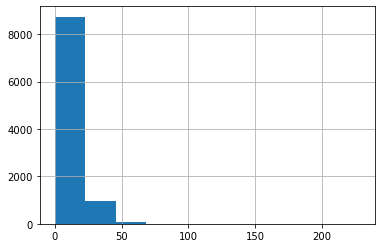

In [68]:
df_june['adj'].hist()

In [69]:
da.list_unique_values(df_june,['Potential'])

List of unique values:

Potential
- 1
- 2
- 3
- 4


In [70]:
market_bin = [-100,80,95,130,1000]
market_bin_names = ['<80','80-100','100-130','>130']

adj_bin = [-100,0.2,3,1000]
adj_bin_names = ['<0.2','0.2-3','>3']

df_june['Market Ratio Cat'] = pd.cut(df_june['Market Ratio Perc'], bins = market_bin, labels = market_bin_names)
df_june['Adjustment Ratio Cat'] = pd.cut(df_june['adj'], bins = adj_bin, labels = adj_bin_names)

df_june['Potential Cat'] = df_june['Potential'].map({1:'Too Early to Rank',2:'Low Potential',3:'Medium Potential',4:'High Potential'})

featureForLogReg = ['Market Ratio Cat','Adjustment Ratio Cat','Potential Cat','Performance']
df_forClustering_june = df_june[featureForLogReg+['Employee ID']]

performance
Performance
- Developing Contributor
- Exceptional Contributor
- Not Performing
- Successful Contributor

Potential
- High
- Low
- Medium
- Too Early to Rank

In [71]:
for col in featureForLogReg:
        df_forClustering_june = df_forClustering_june.join(pd.get_dummies(df_forClustering_june[col])) 
df_forClustering_june = df_forClustering_june.drop(featureForLogReg, axis=1)

In [73]:
prob = clf.predict_proba(df_forClustering_june.drop(['Employee ID'], axis=1))
prob = [x for (x,y) in prob]

df_forClustering_june['Termination Probability'] = prob
df_forClustering_june

,Employee ID,<80,80-100,100-130,>130,<0.2,0.2-3,>3,High Potential,Low Potential,Medium Potential,Too Early to Rank,Developing Contributor,Exceptional Contributor,Not Performing,Successful Contributor,Termination Probability
0,110014011,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0.998808
1,200072269,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0.997700
2,110015588,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0.997700
3,100005405,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0.997175
4,200004899,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0.997175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9801,200395613,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0.967289
9802,200395679,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0.962245
9803,200395759,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0.967289
9804,200396135,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0.964609


In [76]:
df_forClustering_order_june = df_forClustering_june.sort_values(by =['Termination Probability'], ascending = False).reset_index()

In [77]:
df_forClustering_order_june['Rank'] = pd.qcut(df_forClustering_order_june.index, 5, labels = False)

In [78]:
df_forClustering_order_june.groupby('Rank').agg({'Termination Probability':'min','Employee ID':'count'})

,Termination Probability,Employee ID
Rank,,
0,0.990262,1962
1,0.985631,1961
2,0.967289,1961
3,0.962245,1961
4,0.894950,1961


In [79]:
df_forClustering_order_june.groupby('Rank').agg({'Termination Probability':'max','Employee ID':'count'})

,Termination Probability,Employee ID
Rank,,
0,0.998854,1962
1,0.990262,1961
2,0.985631,1961
3,0.967289,1961
4,0.962245,1961


In [80]:
df_probability_june = df_forClustering_order_june.groupby(by =['Rank']).agg({'Employee ID':'count'})

In [173]:
df_forClustering_order_rev_june = df_forClustering_june.sort_values('Termination Probability', ascending = True).reset_index()
df_forClustering_order_rev_june

,index,Employee ID,<80,80-100,100-130,>130,<0.2,0.2-3,>3,High Potential,Low Potential,Medium Potential,Too Early to Rank,Developing Contributor,Exceptional Contributor,Not Performing,Successful Contributor,Termination Probability
0,3643,200201039,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0.894950
1,4011,200170820,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0.894950
2,3644,200201578,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0.894950
3,3544,200256138,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0.894950
4,3945,100003542,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0.894950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9801,5603,100000796,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0.998854
9802,5471,100000146,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0.998854
9803,5008,1866,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0.998854
9804,7597,200149890,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0.998854


In [177]:
df_forClustering_order_rev_june['Rank'] = pd.qcut(df_forClustering_order_rev_june.index, 5, labels = False)
df_forClustering_order_rev_june.groupby('Rank').agg({'Termination Probability':'min','Employee ID':'count'})

,Termination Probability,Employee ID
Rank,,
0,0.894950,1962
1,0.962245,1961
2,0.967289,1961
3,0.985631,1961
4,0.990262,1961


In [179]:
df_forClustering_order_rev_june

,index,Employee ID,<80,80-100,100-130,>130,<0.2,0.2-3,>3,High Potential,Low Potential,Medium Potential,Too Early to Rank,Developing Contributor,Exceptional Contributor,Not Performing,Successful Contributor,Termination Probability,Rank
0,3643,200201039,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0.894950,0
1,4011,200170820,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0.894950,0
2,3644,200201578,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0.894950,0
3,3544,200256138,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0.894950,0
4,3945,100003542,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0.894950,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9801,5603,100000796,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0.998854,4
9802,5471,100000146,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0.998854,4
9803,5008,1866,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0.998854,4
9804,7597,200149890,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0.998854,4


In [83]:
df_forClustering_order_rev_june.groupby('Rank').agg({'Termination Probability':'max','Employee ID':'count'})

,Termination Probability,Employee ID
Rank,,
0,0.962245,1962
1,0.967289,1961
2,0.985631,1961
3,0.990262,1961
4,0.998854,1961


In [ ]:
df_forClustering_order_rev_june.to_csv('Probability of Termination June.csv')

In [176]:
df_forClustering_order_rev_june

,index,Employee ID,<80,80-100,100-130,>130,<0.2,0.2-3,>3,High Potential,Low Potential,Medium Potential,Too Early to Rank,Developing Contributor,Exceptional Contributor,Not Performing,Successful Contributor,Termination Probability
0,3643,200201039,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0.894950
1,4011,200170820,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0.894950
2,3644,200201578,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0.894950
3,3544,200256138,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0.894950
4,3945,100003542,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0.894950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9801,5603,100000796,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0.998854
9802,5471,100000146,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0.998854
9803,5008,1866,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0.998854
9804,7597,200149890,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0.998854


# Cost Analysis

In [214]:
file_path_10 = r"gs://ppl-analytics-cfs/Survival Ad-hoc/adj_june.xlsx"

In [215]:
new_june = pd.read_excel(file_path_10)

/opt/conda/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [216]:
new_june[['Scenario 1', 'Scenario 2',
       'Scenario 3']]

,Scenario 1,Scenario 2,Scenario 3
0,272.00,0.00,4272.000
1,0.00,0.00,0.000
2,0.00,0.00,0.000
3,0.00,0.00,0.000
4,26510.52,26510.52,36029.072
...,...,...,...
9801,0.00,0.00,0.000
9802,0.00,0.00,0.000
9803,0.00,0.00,0.000
9804,0.00,0.00,0.000


In [217]:
Profile.columns

Index(['Employee ID', 'Gender', 'Job Profile', 'Time in Role (Years)', 'Grade',
       'Performance', 'Retention', 'Potential', 'Market reference annualized',
       'Competency in Role (based on current role)', 'Current Salary',
       'Current Annualized Rate', 'Market Relativity', 'Market Reference',
       'Current Market Ratio', 'Internal Reference', 'Current Internal Ratio',
       'Received Adjustment?', 'Final EIB Adjustment',
       'Final EIB Annualized Salary', 'Final Market Ratio',
       'Final Internal Ratio', 'Adjustment_Diff', 'Recommended Salary/Wage',
       'Recommended Adjustment', 'GPE Priority Categorization - Org Wide',
       '2021 Top Talent', 'Hot Skill', 'HIPO + HIPER',
       'Comp Validated Prioritzation Segment', 'Management Board',
       'Business Unit', 'Supervisory Org', 'Supervisory Org Channel',
       'Categorization Flag', 'PDT FLAG CATEGORIZATION',
       'Adjustment Difference', 'Market Reference Annualized 2', 'index',
       'Terminated', '<80'

In [218]:
df.merge(df_forClustering_order_rev, on = 'Employee ID')

,Employee ID,Gender,Job Profile,Time in Role (Years),Grade,Performance,Retention,Potential,Market reference annualized,Competency in Role (based on current role),...,High Potential,Low Potential,Medium Potential,Too Early to Rank,Developing Contributor,Exceptional Contributor,Not Performing,Successful Contributor,Termination Probability,Rank
0,200000728.0,Female,Registered Practical Nurse - Salaried,5.72,E-40,Successful Contributor,NaN,Medium,55000.0,Fully Competent,...,0,0,1,0,0,0,0,1,0.962245,1
1,10001268.0,Female,Registered Practical Nurse - Salaried,7.23,E-40,Successful Contributor,NaN,Medium,55000.0,Specialized,...,0,0,1,0,0,0,0,1,0.962245,1
2,200153241.0,Female,Registered Practical Nurse - Salaried,3.09,E-40,Successful Contributor,NaN,Medium,55000.0,Fully Competent,...,0,0,1,0,0,0,0,1,0.962245,1
3,200352085.0,Male,Registered Practical Nurse - Salaried,0.02,E-40,Successful Contributor,NaN,Medium,55000.0,New/Minimal,...,0,0,1,0,0,0,0,1,0.962245,1
4,200357091.0,Female,Registered Practical Nurse - Salaried,0.01,E-40,Successful Contributor,NaN,Medium,55000.0,New/Minimal,...,0,0,1,0,0,0,0,1,0.962245,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8556,120000106.0,Male,"Director, Benefits - Salaried",0.03,E-70,Successful Contributor,Medium,Medium,0.0,New/Minimal,...,0,0,1,0,0,0,0,1,0.973002,2
8557,200217196.0,Female,"Senior Manager, Benefits - Salaried",0.03,E-60,Successful Contributor,Medium,Medium,0.0,New/Minimal,...,0,0,1,0,0,0,0,1,0.973002,2
8558,120000075.0,Male,"Senior Director, Pensions - Salaried",0.03,E-80,Successful Contributor,Low,Low,0.0,New/Minimal,...,0,1,0,0,0,0,0,1,0.991996,4
8559,200248747.0,Female,"Senior Director, Benefits - Salaried",0.03,E-80,Successful Contributor,Medium,Medium,0.0,New/Minimal,...,0,0,1,0,0,0,0,1,0.973002,2


In [219]:
new_june.columns

Index(['Employee ID', 'Gender', 'Job Title', 'Job Profile',
       'Time in Role (Years)', 'Grade', 'Performance', 'Performance.1',
       'Retention', 'Potential', 'Priority Segment', 'Market reference',
       'Competency in Role (based on current role) Manual Override',
       'Current rate', 'Current Annualized Rate', 'Market Reference',
       'Market reference annualized', 'Market Ratio', 'Internal Reference',
       'Internal Ratio', 'Manual RECO Salary/Wage ($)', 'PRIORITY',
       'Recommended Salary/Wage', 'Off-Cycle Adjustment ($)',
       'Off cycle recommended?', 'Off-Cycle Adjustment (%)',
       'New Market Ratio', 'New Internal Ratio', 'Recommended Increase #1',
       'Recommended Increase #2', 'Hourly', 'Like for Like Gap',
       'Target market rate based on talent factors',
       'Cost to Bring to Recommended Salary (Women only)', 'Market Relativity',
       'GPE Priority Categorization', '2021 Top Talent', 'Hot Skills', 'HIPO',
       'HIPER', 'Management Board', 

In [220]:
june_merged = new_june.merge(df_forClustering_order_rev_june, on = 'Employee ID')
june_merged['Management Board']

0            Mark Wilson
1            Mark Wilson
2            Mark Wilson
3            Greg Ramier
4       Richard Dufresne
              ...       
9801           Rob Wiebe
9802         Mark Wilson
9803      David Markwell
9804        Barry Columb
9805          Jeff Leger
Name: Management Board, Length: 9806, dtype: object

In [221]:
feb_merged = df.merge(df_forClustering_order_rev, on = 'Employee ID')

In [222]:
feb_merged.columns

Index(['Employee ID', 'Gender', 'Job Profile', 'Time in Role (Years)', 'Grade',
       'Performance', 'Retention', 'Potential', 'Market reference annualized',
       'Competency in Role (based on current role)', 'Current Salary',
       'Current Annualized Rate', 'Market Relativity', 'Market Reference',
       'Current Market Ratio', 'Internal Reference', 'Current Internal Ratio',
       'Received Adjustment?', 'Final EIB Adjustment',
       'Final EIB Annualized Salary', 'Final Market Ratio',
       'Final Internal Ratio', 'Adjustment_Diff', 'Recommended Salary/Wage',
       'Recommended Adjustment', 'GPE Priority Categorization - Org Wide',
       '2021 Top Talent', 'Hot Skill', 'HIPO + HIPER',
       'Comp Validated Prioritzation Segment', 'Management Board',
       'Business Unit', 'Supervisory Org', 'Supervisory Org Channel',
       'Categorization Flag', 'PDT FLAG CATEGORIZATION',
       'Adjustment Difference', 'Market Reference Annualized 2', 'index',
       'Terminated', '<80'

In [226]:
june_merged['% Scenario 1 Increase'] = (june_merged['Scenario 1'])/june_merged['Current Annualized Rate']*100
june_merged['% Scenario 2 Increase'] = (june_merged['Scenario 2'])/june_merged['Current Annualized Rate']*100
june_merged['% Scenario 3 Increase'] = (june_merged['Scenario 3'])/june_merged['Current Annualized Rate']*100

In [227]:
final_merge = june_merged.merge(feb_merged, on = 'Employee ID')
final_merge['% Adjustment_Diff'] = final_merge['Adjustment_Diff']*100

In [ ]:
pd.cut(df_agg, ['% Scenario 1 Increase'])                                                       
1-3%
3-8%
greater than 8

In [228]:
df_agg = final_merge.groupby(['Management Board_x','Rank_x']).agg({'Employee ID':'count','% Scenario 1 Increase':'mean',
                                                       '% Scenario 2 Increase':'mean',
                                                       '% Scenario 3 Increase':'mean',


Employee ID  % Scenario 1 Increase  \
Management Board_x Rank_x                                       
Barry Columb       0                53               0.000000   
                   1                79               0.000000   
                   2                59               0.000000   
                   3                48               2.364859   
                   4                54               1.057093   
...                                ...                    ...   
Robert Sawyer      0                50               0.000000   
                   1                33               0.000000   
                   2                53               1.282991   
                   3                43               5.542738   
                   4                60               0.515456   

                           % Scenario 2 Increase  % Scenario 3 Increase  \
Management Board_x Rank_x                                                 
Barry Columb       0                    1.136765               0.000000   
                   1                    0.179747               0.000000   
                   2                    1.499854               0.000000   
                   3                    1.287584               5.045374   
                   4                    1.163280               2.673262   
...                                          ...                    ...   
Robert Sawyer      0                   15.256138               0.000000   
                   1                    1.773867               0.000000   
                   2                    5.800068               1.788649   
                   3                    3.726935               9.699029   
                   4                    1.976040               1.468094   

                           % Adjustment_Diff  
Management Board_x Rank_x                     
Barry Columb       0                0.918043  
                   1                1.619253  
                   2                0.640107  
                   3                2.380155  
                   4                2.028629  
...                                      ...  
Robert Sawyer      0                0.160073  
                   1                0.761259  
                   2                0.655805  
                   3                0.768335  
                   4                1.583277  

[65 rows x 5 columns]

In [182]:
df_clustered_merge = df_forClustering_order_rev_june.merge(df_forClustering_order_rev, on = 'Employee ID')

In [ ]:
management, rank, # of colleague in rank, increase, salary, 

In [185]:
df_june.merge(df_clustered_merge, on = 'Employee ID').groupby(['Management Board','Rank']).gg({'Employee ID':'count','Current Annualized Rate':'mean',
                  'Final EIB Adjustment':'mean'})

KeyError: 'Rank'

In [168]:
Profile = df.merge(df_forClustering_order_rev, on = 'Employee ID')
Profile

,Employee ID,Gender,Job Profile,Time in Role (Years),Grade,Performance,Retention,Potential,Market reference annualized,Competency in Role (based on current role),...,High Potential,Low Potential,Medium Potential,Too Early to Rank,Developing Contributor,Exceptional Contributor,Not Performing,Successful Contributor,Termination Probability,Rank
0,200000728.0,Female,Registered Practical Nurse - Salaried,5.72,E-40,Successful Contributor,NaN,Medium,55000.0,Fully Competent,...,0,0,1,0,0,0,0,1,0.962245,1
1,10001268.0,Female,Registered Practical Nurse - Salaried,7.23,E-40,Successful Contributor,NaN,Medium,55000.0,Specialized,...,0,0,1,0,0,0,0,1,0.962245,1
2,200153241.0,Female,Registered Practical Nurse - Salaried,3.09,E-40,Successful Contributor,NaN,Medium,55000.0,Fully Competent,...,0,0,1,0,0,0,0,1,0.962245,1
3,200352085.0,Male,Registered Practical Nurse - Salaried,0.02,E-40,Successful Contributor,NaN,Medium,55000.0,New/Minimal,...,0,0,1,0,0,0,0,1,0.962245,1
4,200357091.0,Female,Registered Practical Nurse - Salaried,0.01,E-40,Successful Contributor,NaN,Medium,55000.0,New/Minimal,...,0,0,1,0,0,0,0,1,0.962245,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8556,120000106.0,Male,"Director, Benefits - Salaried",0.03,E-70,Successful Contributor,Medium,Medium,0.0,New/Minimal,...,0,0,1,0,0,0,0,1,0.973002,2
8557,200217196.0,Female,"Senior Manager, Benefits - Salaried",0.03,E-60,Successful Contributor,Medium,Medium,0.0,New/Minimal,...,0,0,1,0,0,0,0,1,0.973002,2
8558,120000075.0,Male,"Senior Director, Pensions - Salaried",0.03,E-80,Successful Contributor,Low,Low,0.0,New/Minimal,...,0,1,0,0,0,0,0,1,0.991996,4
8559,200248747.0,Female,"Senior Director, Benefits - Salaried",0.03,E-80,Successful Contributor,Medium,Medium,0.0,New/Minimal,...,0,0,1,0,0,0,0,1,0.973002,2


In [169]:
Profile_agg = Profile.groupby('Management Board')\
            .agg({'Terminated':'mean',
                  'Termination Probability':'mean',
                  'Current Annualized Rate':'mean',
                  'Final EIB Adjustment':'mean'})\
            .sort_values(by = ['Termination Probability'],ascending = False)\
            .rename(columns = {'Terminated':'Profile Termination Rate',
                              'Final EIB Adjustment':'Feb EIB Adjustment, Average',
                              'Termination Probability':'Feb Termination Probability, Average',
                              'Current Annualized Rate':'Feb Annualized Rate, Average'}).reset_index()
Profile_agg

,Management Board,Profile Termination Rate,"Feb Termination Probability, Average","Feb Annualized Rate, Average","Feb EIB Adjustment, Average"
0,Mark Wilson,0.011601,0.977254,94261.331787,303.592111
1,Ian Freedman,0.010989,0.976879,80655.430769,639.323407
2,Rob Wiebe,0.014278,0.974283,68046.405917,496.446233
3,Kevin Groh,0.000000,0.973972,97555.656724,327.593103
4,Jocyanne Bourdeau,0.012821,0.973797,84515.353483,1372.843098
5,Greg Ramier,0.004338,0.973334,91580.696033,1848.180477
6,Richard Dufresne,0.020305,0.972995,75392.776912,516.331401
7,Robert Sawyer,0.008876,0.972336,80717.047515,719.350183
8,David Markwell,0.039249,0.971570,103283.614343,122.618369
9,Barry Columb,0.057637,0.971073,91756.365677,1600.360979


In [170]:
Profile_june = df_june.merge(df_forClustering_order_rev_june, on = 'Employee ID')\
                .groupby(['Management Board','Rank'])\
                .agg({'Employee ID':'count','Termination Probability':'mean','Current Annualized Rate':'mean'})\
                .rename(columns = {'Employee ID':'Current # of Colleagues'})\
                .sort_values(by = ['Termination Probability'],ascending = False)\
                .reset_index()
Profile_june

,Management Board,Rank,Current # of Colleagues,Termination Probability,Current Annualized Rate
0,Nick Henn,4,9,0.996394,150841.100000
1,Galen Weston,4,84,0.995207,129741.472619
2,Barry Columb,4,54,0.994877,104546.167222
3,Ian Freedman,4,43,0.994789,98761.759302
4,Mark Wilson,4,146,0.994486,101628.682972
...,...,...,...,...,...
60,Robert Sawyer,0,59,0.952309,86665.839322
61,Frank Gambioli,0,138,0.951349,88999.096812
62,Galen Weston,0,192,0.950782,117508.544531
63,Richard Dufresne,0,209,0.950404,70638.212369


In [171]:
Profile_diff = Profile_june.merge(Profile_agg, on = ['Management Board'])\
                .rename(columns = {'Termination Probability_x':'Current Termination Probability',
                            'Current Annualized Rate_x':'Current Annualized Rate',
                            'Final Adjustment on Feb':'Final Adjustment on Feb'})

Profile_diff['Salary Increase for Profile $'] = (Profile_diff['Current Annualized Rate'] - \
                                                    Profile_diff['Feb Annualized Rate, Average'])

Profile_diff['% Salary Increase for Profile'] = (Profile_diff['Current Annualized Rate'] - \
                                                    Profile_diff['Feb Annualized Rate, Average'])/\
                                                    Profile_diff['Current Annualized Rate']*100

Profile_diff

,Management Board,Rank,Current # of Colleagues,Termination Probability,Current Annualized Rate,Profile Termination Rate,"Feb Termination Probability, Average","Feb Annualized Rate, Average","Feb EIB Adjustment, Average",Salary Increase for Profile $,% Salary Increase for Profile
0,Nick Henn,4,9,0.996394,150841.100000,0.028571,0.970436,120748.767000,1140.846143,30092.333000,19.949691
1,Nick Henn,3,10,0.988822,129653.038000,0.028571,0.970436,120748.767000,1140.846143,8904.271000,6.867769
2,Nick Henn,2,14,0.971615,124390.008571,0.028571,0.970436,120748.767000,1140.846143,3641.241571,2.927278
3,Nick Henn,1,23,0.963823,121882.762174,0.028571,0.970436,120748.767000,1140.846143,1133.995174,0.930398
4,Nick Henn,0,13,0.961611,116079.738462,0.028571,0.970436,120748.767000,1140.846143,-4669.028538,-4.022260
5,Galen Weston,4,84,0.995207,129741.472619,0.047337,0.968867,114616.164822,232.858269,15125.307797,11.658036
6,Galen Weston,3,130,0.988626,131916.256615,0.047337,0.968867,114616.164822,232.858269,17300.091793,13.114450
7,Galen Weston,2,84,0.972609,97398.298929,0.047337,0.968867,114616.164822,232.858269,-17217.865894,-17.677789
8,Galen Weston,1,244,0.963369,121359.018238,0.047337,0.968867,114616.164822,232.858269,6742.853415,5.556121
9,Galen Weston,0,192,0.950782,117508.544531,0.047337,0.968867,114616.164822,232.858269,2892.379709,2.461421


In [172]:
Profile_diff[Profile_diff['Pro`bfile Termination Rate'] > 0].sort_values(by =['Termination Probability','% Salary Increase for Profile'],ascending = False).to_excel('Management board termination probability.xlsx')

In [168]:
Profile = df.merge(df_forClustering_order_rev, on = 'Employee ID')
Profile

,Employee ID,Gender,Job Profile,Time in Role (Years),Grade,Performance,Retention,Potential,Market reference annualized,Competency in Role (based on current role),...,High Potential,Low Potential,Medium Potential,Too Early to Rank,Developing Contributor,Exceptional Contributor,Not Performing,Successful Contributor,Termination Probability,Rank
0,200000728.0,Female,Registered Practical Nurse - Salaried,5.72,E-40,Successful Contributor,NaN,Medium,55000.0,Fully Competent,...,0,0,1,0,0,0,0,1,0.962245,1
1,10001268.0,Female,Registered Practical Nurse - Salaried,7.23,E-40,Successful Contributor,NaN,Medium,55000.0,Specialized,...,0,0,1,0,0,0,0,1,0.962245,1
2,200153241.0,Female,Registered Practical Nurse - Salaried,3.09,E-40,Successful Contributor,NaN,Medium,55000.0,Fully Competent,...,0,0,1,0,0,0,0,1,0.962245,1
3,200352085.0,Male,Registered Practical Nurse - Salaried,0.02,E-40,Successful Contributor,NaN,Medium,55000.0,New/Minimal,...,0,0,1,0,0,0,0,1,0.962245,1
4,200357091.0,Female,Registered Practical Nurse - Salaried,0.01,E-40,Successful Contributor,NaN,Medium,55000.0,New/Minimal,...,0,0,1,0,0,0,0,1,0.962245,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8556,120000106.0,Male,"Director, Benefits - Salaried",0.03,E-70,Successful Contributor,Medium,Medium,0.0,New/Minimal,...,0,0,1,0,0,0,0,1,0.973002,2
8557,200217196.0,Female,"Senior Manager, Benefits - Salaried",0.03,E-60,Successful Contributor,Medium,Medium,0.0,New/Minimal,...,0,0,1,0,0,0,0,1,0.973002,2
8558,120000075.0,Male,"Senior Director, Pensions - Salaried",0.03,E-80,Successful Contributor,Low,Low,0.0,New/Minimal,...,0,1,0,0,0,0,0,1,0.991996,4
8559,200248747.0,Female,"Senior Director, Benefits - Salaried",0.03,E-80,Successful Contributor,Medium,Medium,0.0,New/Minimal,...,0,0,1,0,0,0,0,1,0.973002,2


In [169]:
Profile_agg = Profile.groupby('Management Board')\
            .agg({'Terminated':'mean',
                  'Termination Probability':'mean',
                  'Current Annualized Rate':'mean',
                  'Final EIB Adjustment':'mean'})\
            .sort_values(by = ['Termination Probability'],ascending = False)\
            .rename(columns = {'Terminated':'Profile Termination Rate',
                              'Final EIB Adjustment':'Feb EIB Adjustment, Average',
                              'Termination Probability':'Feb Termination Probability, Average',
                              'Current Annualized Rate':'Feb Annualized Rate, Average'}).reset_index()
Profile_agg

,Management Board,Profile Termination Rate,"Feb Termination Probability, Average","Feb Annualized Rate, Average","Feb EIB Adjustment, Average"
0,Mark Wilson,0.011601,0.977254,94261.331787,303.592111
1,Ian Freedman,0.010989,0.976879,80655.430769,639.323407
2,Rob Wiebe,0.014278,0.974283,68046.405917,496.446233
3,Kevin Groh,0.000000,0.973972,97555.656724,327.593103
4,Jocyanne Bourdeau,0.012821,0.973797,84515.353483,1372.843098
5,Greg Ramier,0.004338,0.973334,91580.696033,1848.180477
6,Richard Dufresne,0.020305,0.972995,75392.776912,516.331401
7,Robert Sawyer,0.008876,0.972336,80717.047515,719.350183
8,David Markwell,0.039249,0.971570,103283.614343,122.618369
9,Barry Columb,0.057637,0.971073,91756.365677,1600.360979


In [170]:
Profile_june = df_june.merge(df_forClustering_order_rev_june, on = 'Employee ID')\
                .groupby(['Management Board','Rank'])\
                .agg({'Employee ID':'count','Termination Probability':'mean','Current Annualized Rate':'mean'})\
                .rename(columns = {'Employee ID':'Current # of Colleagues'})\
                .sort_values(by = ['Termination Probability'],ascending = False)\
                .reset_index()
Profile_june

,Management Board,Rank,Current # of Colleagues,Termination Probability,Current Annualized Rate
0,Nick Henn,4,9,0.996394,150841.100000
1,Galen Weston,4,84,0.995207,129741.472619
2,Barry Columb,4,54,0.994877,104546.167222
3,Ian Freedman,4,43,0.994789,98761.759302
4,Mark Wilson,4,146,0.994486,101628.682972
...,...,...,...,...,...
60,Robert Sawyer,0,59,0.952309,86665.839322
61,Frank Gambioli,0,138,0.951349,88999.096812
62,Galen Weston,0,192,0.950782,117508.544531
63,Richard Dufresne,0,209,0.950404,70638.212369


In [171]:
Profile_diff = Profile_june.merge(Profile_agg, on = ['Management Board'])\
                .rename(columns = {'Termination Probability_x':'Current Termination Probability',
                            'Current Annualized Rate_x':'Current Annualized Rate',
                            'Final Adjustment on Feb':'Final Adjustment on Feb'})

Profile_diff['Salary Increase for Profile $'] = (Profile_diff['Current Annualized Rate'] - \
                                                    Profile_diff['Feb Annualized Rate, Average'])

Profile_diff['% Salary Increase for Profile'] = (Profile_diff['Current Annualized Rate'] - \
                                                    Profile_diff['Feb Annualized Rate, Average'])/\
                                                    Profile_diff['Current Annualized Rate']*100

Profile_diff

,Management Board,Rank,Current # of Colleagues,Termination Probability,Current Annualized Rate,Profile Termination Rate,"Feb Termination Probability, Average","Feb Annualized Rate, Average","Feb EIB Adjustment, Average",Salary Increase for Profile $,% Salary Increase for Profile
0,Nick Henn,4,9,0.996394,150841.100000,0.028571,0.970436,120748.767000,1140.846143,30092.333000,19.949691
1,Nick Henn,3,10,0.988822,129653.038000,0.028571,0.970436,120748.767000,1140.846143,8904.271000,6.867769
2,Nick Henn,2,14,0.971615,124390.008571,0.028571,0.970436,120748.767000,1140.846143,3641.241571,2.927278
3,Nick Henn,1,23,0.963823,121882.762174,0.028571,0.970436,120748.767000,1140.846143,1133.995174,0.930398
4,Nick Henn,0,13,0.961611,116079.738462,0.028571,0.970436,120748.767000,1140.846143,-4669.028538,-4.022260
5,Galen Weston,4,84,0.995207,129741.472619,0.047337,0.968867,114616.164822,232.858269,15125.307797,11.658036
6,Galen Weston,3,130,0.988626,131916.256615,0.047337,0.968867,114616.164822,232.858269,17300.091793,13.114450
7,Galen Weston,2,84,0.972609,97398.298929,0.047337,0.968867,114616.164822,232.858269,-17217.865894,-17.677789
8,Galen Weston,1,244,0.963369,121359.018238,0.047337,0.968867,114616.164822,232.858269,6742.853415,5.556121
9,Galen Weston,0,192,0.950782,117508.544531,0.047337,0.968867,114616.164822,232.858269,2892.379709,2.461421


In [172]:
Profile_diff[Profile_diff['Pro`bfile Termination Rate'] > 0].sort_values(by =['Termination Probability','% Salary Increase for Profile'],ascending = False).to_excel('Management board termination probability.xlsx')

In [ ]:
how many # colleague # count per adj cat

In [ ]:
how many supposed get

# PC Bank

In [ ]:
df_merged_pc = df_pc.merge(df_colleague[['ID - Win', 'Hire Date','Terminated', 'Termination Date','Termination Category']], left_on = 'Employee ID' , right_on = 'ID - Win', how = 'left')

In [ ]:
filter_1 = (df_merged_pc['Termination Category'] != 'Involuntary')

In [ ]:
df_final_pc = df_merged_pc[(filter_1)]

In [ ]:
print(df_pc.shape)
print(df_colleague.shape)
print(df_merged_pc.shape)
print(df_final_pc.shape)

In [ ]:
df_final_pc['Terminated'] = np.where(df_final_pc['Terminated'] == 'Yes', 1, 0)

In [ ]:
df_final_pc.columns

In [ ]:
df_pc_termination = df_final_pc.merge(df_forClustering_order_rev_june, on='Employee ID')[['Termination Probability','Terminated']]

In [ ]:
df_pc_termination.to_excel('PC probability based on Feb Adjust model.xlsx')

In [ ]:
df_pc_termination.shape

In [ ]:
df_pc_termination[df_pc_termination['Terminated'] == 1]

In [ ]:
df_june['Market Ratio Perc'] = df_june['Market Ratio']*100

In [ ]:
df_june['adj'] = df_june['Total % of adjustment']*100

In [ ]:
df_june['adj'].hist()

In [ ]:
da.list_unique_values(df_june,['Potential'])

In [ ]:
market_bin = [-100,80,95,130,1000]
market_bin_names = ['<80','80-100','100-130','>130']

adj_bin = [-100,0.2,3,1000]
adj_bin_names = ['<0.2','0.2-3','>3']

df_june['Market Ratio Cat'] = pd.cut(df_june['Market Ratio Perc'], bins = market_bin, labels = market_bin_names)
df_june['Adjustment Ratio Cat'] = pd.cut(df_june['adj'], bins = adj_bin, labels = adj_bin_names)

df_june['Potential Cat'] = df_june['Potential'].map({1:'Too Early to Rank',2:'Low Potential',3:'Medium Potential',4:'High Potential'})

featureForLogReg = ['Market Ratio Cat','Adjustment Ratio Cat','Potential Cat','Performance']
df_forClustering_june = df_june[featureForLogReg+['Employee ID']]

performance
Performance
- Developing Contributor
- Exceptional Contributor
- Not Performing
- Successful Contributor

Potential
- High
- Low
- Medium
- Too Early to Rank

In [ ]:
for col in featureForLogReg:
        df_forClustering_june = df_forClustering_june.join(pd.get_dummies(df_forClustering_june[col])) 
df_forClustering_june = df_forClustering_june.drop(featureForLogReg, axis=1)

In [ ]:
Index(['Terminated', 'Employee ID', '<80', '80-100', '100-130', '>130', '<0.2',
       '0.2-3', '>3', 'High Potential', 'Low Potential', 'Medium Potential',
       'Developing Contributor', 'Exceptional Contributor', 'Not Performing',
       'Successful Contributor', 'Termination Probability', 'Rank'],
      dtype='object')

In [ ]:
prob = clf.predict_proba(df_forClustering_june.drop(['Employee ID'], axis=1))
prob = [x for (x,y) in prob]

df_forClustering_june['Termination Probability'] = prob
df_forClustering_june

In [ ]:
df_forClustering_order = df_forClustering.sort_values('Termination Probability', ascending = False).reset_index()

In [ ]:
df_forClustering_order_june = df_forClustering_june.sort_values(by =['Termination Probability'], ascending = False).reset_index()

In [ ]:
df_forClustering_order_june['Rank'] = pd.qcut(df_forClustering_order_june.index, 5, labels = False)

In [ ]:
df_forClustering_order_june.groupby('Rank').agg({'Termination Probability':'min','Employee ID':'count'})

In [ ]:
df_forClustering_order_june.groupby('Rank').agg({'Termination Probability':'max','Employee ID':'count'})

In [ ]:
df_probability_june = df_forClustering_order_june.groupby(by =['Rank']).agg({'Employee ID':'count'})

In [ ]:
df_forClustering_order_rev_june = df_forClustering_june.sort_values('Termination Probability', ascending = True).reset_index()
df_forClustering_order_rev_june

In [ ]:
df_forClustering_order_rev_june['Rank'] = pd.qcut(df_forClustering_order_rev_june.index, 5, labels = False)
df_forClustering_order_rev_june.groupby('Rank').agg({'Termination Probability':'min','Employee ID':'count'})

In [ ]:
df_forClustering_order_rev_june.groupby('Rank').agg({'Termination Probability':'max','Employee ID':'count'})

In [ ]:
df_forClustering_order_rev_june.to_csv('Probability of Termination June.csv')

In [ ]:
df_june.shape

In [ ]:
df_forClustering_order_rev_june

In [ ]:
df_prob = df_forClustering_order_rev.groupby(by =['Rank','Terminated']).agg({'Employee ID':'count'})

In [ ]:
df_forClustering.sort_values(['Termination Probability'], ascending = False)[['Termination Probability','Employee ID', 'Terminated']].to_csv('termination Probability.csv')

In [ ]:
y_true = df_forClustering_validate['Terminated']
y_predicted = clf.predict(df_forClustering_validate.drop(['Employee ID','Terminated'], axis=1))

tn, fp, fn, tp =  confusion_matrix(y_true,y_predicted).ravel()

In [ ]:
df_forClustering_validate['Terminated'].value_counts()

In [ ]:
dicCofVal = dict()
for x in range(len(df_forClustering_x.columns)):
    dicCofVal[df_forClustering_x.columns[x]] = list(clf.coef_[0])[x]

len(df_forClustering_x.columns)

df_coefValues = pd.DataFrame(columns = df_forClustering_x.columns)
df_coefValues = df_coefValues.append(dicCofVal, ignore_index=True).T
df_coefValues.columns = ['coef']

df_coefValues['odds'] = df_coefValues['coef'].apply(np.exp)
df_coefValues['prob'] = df_coefValues['odds'] /(1+df_coefValues['odds'])

featureClass = list()
for x in df_coefValues.index:
    foundMatch = False
    for feature in featureForLogReg:
        if feature in df_final.columns:
            if x in df_final[feature].unique():
                featureClass.append(feature)
                foundMatch = True

        if feature in df_forClustering.columns:
            if x in df_forClustering[feature].unique():
                featureClass.append(feature)
                foundMatch = True

    if not foundMatch:
        featureClass.append('NotFound')

df_coefValues['featureClass'] = featureClass


In [ ]:
df_coefValues.index

In [ ]:
df_coefValues.sort_values(by = ['coef'], ascending = False)[0:3].rename({'<0.2':'Less than 0.2% Salary Adjustment','<80':'Less than 80% Market Ratio'})

In [ ]:
df_coefValues.sort_values(by = ['coef'], ascending = False)[-3:].rename({'<0.2':'Less than 0.2% Salary Adjustment','<80':'Less than 80% Market Ratio'})

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = positive_corr.index
students = positive_corr['coef']
ax.bar(langs,students)
plt.show()

# Termination Proability vs features

In [ ]:
df_active = df_final.merge(listOfActiveColleagues[['Employee ID','Termination Probability']], on = 'Employee ID')

In [ ]:
plt.plot(np.sort(listOfActiveColleagues['Termination Probability'])[::-1])

In [ ]:
probability_bin = [-100,0.2,0.4,0.6,0.8,100]
probability_bin_names = ['<20','20-40','40-60','60-80','>']
df_final['adj_cat'] = pd.cut(df_final['Adjustment Difference'], bins = adj_bin, labels = adj_bin_names)

In [ ]:
df_active_potential = df_active.groupby('Potential').agg({'Employee ID':'count','HIPO + HIPER':'mean','Hot Skill':'mean','2021 Top Talent':'mean','Adjustment Difference':'mean','Termination Probability':'mean'})
display(df_active_potential)

In [ ]:
df_active_perform = df_active.groupby('Performance').agg({'Employee ID':'count','HIPO + HIPER':'mean','Hot Skill':'mean','2021 Top Talent':'mean','Adjustment Difference':'mean','Termination Probability':'mean'})
display(df_active_perform)

In [ ]:
table = pd.pivot_table(df_active, values = 'Termination Probability', index = ['Potential'], columns =['Performance'], aggfunc = np.mean)
table

# Results

In [ ]:
listOfActiveColleagues.to_excel(r"gs://ppl-analytics-cfs/Survival Ad-hoc/Termination Probability.xlsx")


# Logistic Regression with WoE

In [ ]:
df_final.columns

In [ ]:
df_withWOE = df_final.merge(df_woe_adjust[['woe']].reset_index(), on='adj_cat', how='left')
df_withWOE.rename(columns = {'woe':'woe_adjustment'}, inplace=True)

df_withWOE = df_withWOE.merge(df_woe_market[['woe']].reset_index(), on='market_cat', how='left')
df_withWOE.rename(columns = {'woe':'woe_market'}, inplace=True)


In [ ]:
df_withWOE[['Employee ID','woe_market','woe_adjustment','Terminated']]

In [ ]:
df_withWOE.replace([np.inf, -np.inf], np.nan, inplace=True)

print(df_withWOE.shape)
df_withWOE.dropna(inplace = True)
print(df_withWOE.shape)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
df_withWOE.shape

In [ ]:
df_withWOE

In [ ]:
xFeatures = columnsToConsiderForLR = ['woe_adjustment','woe_market']

# ['Market Ratio Cat','Adjustment Ratio Cat','Potential Cat','Performance']
df_train = df_withWOE.groupby('Terminated', group_keys=False).apply(lambda x: x.sample(3))


df_withWOE_forLR_train_x = df_train[xFeatures]
df_withWOE_forLR_train_y = df_train['Terminated']

clf1 = LogisticRegression(random_state=0)
clf1.fit(df_withWOE_forLR_train_x,df_withWOE_forLR_train_y)



dicCofVal = dict()

for x in range(len(df_withWOE_forLR_train_x.columns)):
    dicCofVal[df_withWOE_forLR_train_x.columns[x]] = list(clf1.coef_[0])[x]


df_coefValues = pd.DataFrame(columns =df_withWOE_forLR_train_x.columns)
df_coefValues = df_coefValues.append(dicCofVal, ignore_index=True).T
df_coefValues.columns = ['coef']

df_coefValues['odds'] = df_coefValues['coef'].apply(np.exp)
df_coefValues['prob'] = df_coefValues['odds'] /(1+df_coefValues['odds'])

df_coefValues